# Supervised methods checking different basic concepts for introduction ML course:

   #####  __**Model Selection**__: Cross Validation types, Grid Search, some metrics.

   #####  __**Classification**__: Nearest Neighbors (Specially KNN), Naives Bayes Gaussian, SVM, Data Three and  Ensemble Methods: Random Forest and Boosting (ADB) and Neural Networks. 

   #####  __**Dimensionality Reduction**__: Principal Component Analysis (PCA) 


# Answer 1) 
## For a better comprehension, I choose __***BREAST CANCER***__ dataset

In [1]:
#1) Importing libraries from dataset. Also, we charge the dataset
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import time


# Answer 2)

2) That´s a dataset with **569 cases (X) of Observations** (row) with **30 attributes** (columns)
 Each attribute is composed by **numeric discret** metrics of every one of the 30 features.

#**'feature_names'**: array(['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error', 'fractal dimension error','worst radius', 'worst texture', 'worst perimeter', 'worst area','worst smoothness', 'worst compactness', 'worst concavity','worst concave points', 'worst symmetry', 'worst fractal dimension'],

 On other hand, **labels (y)** for each one are also 569 with a binary outpout: 
 meaning 0 or 1 for indicates malignant or benign study case result.
 
Due to discrete values, we will consider it is suitable for **classification** problems.

We will parse our objetc to dataframe just for a better data exploration as follow:

In [2]:
import pandas as pd

data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Answer 3) "Playing" with experiments in classrom with other dataset and giving additional value

### First, we will create variables for X and y in order to apply diferent methods:

In [3]:
x= data.data
y= data.target

# HOLD OUT

#### USING DOUBLE SPLIT() FOR SEPARATE A 15% TO VALIDATION (NOT TRAINED METHOD)


In [4]:
from sklearn.model_selection import train_test_split

X_model, X_validation, Y_model, Y_validation = train_test_split(x, y, test_size=0.15, random_state=42)

#### AND SEPARATE A TRAIN AND TEST DATA OF THE 85% OF DATASET.

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_model, Y_model, test_size=0.20, random_state=42)

## So, step by step will be:

##### 1) Train model, "fit" with Xtrain, YTrain.
##### 2) Check the model with Y test. (Y pred)
##### 3) Perform a best model
##### 4) PRODUCTION TIME: Compare model with Y validation (Y)

# **KNN**

###  STRATIFIED VS SHUFFLE

5) Choosing a stratified process, despite is not big sample, just 569 but with 30 features...so ensuring avoid repetitions of random shuffleSplit method.

#### STRATIFIED SHUFFLE SPLIT 

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
misss = StratifiedShuffleSplit(20, 0.2) #reducing test for ¿better train? Lets see

from sklearn.neighbors import KNeighborsClassifier
misKvecinos = KNeighborsClassifier(n_neighbors=3)

fallos= []# Failures count
index = 0 #Index initializated to 0

for train_index, test_index in misss.split(X_model,Y_model):

    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
   
    Ytrain = y[train_index]
    Ytest = y[test_index]
   
    misKvecinos.fit(Xtrain,Ytrain)
    Ypred = misKvecinos.predict(Xtest)
    fallos.append(sum(Ypred != Ytest))
    index = index+1
    
print(fallos)
print("Accuracy is: "+ str(sum(Ypred == Ytest) / len(Ytest)))

[5, 5, 7, 10, 9, 11, 7, 7, 7, 8, 4, 10, 7, 4, 11, 6, 9, 12, 2, 7]
Accuracy is: 0.927835051546


# METRICS DIAGRAM

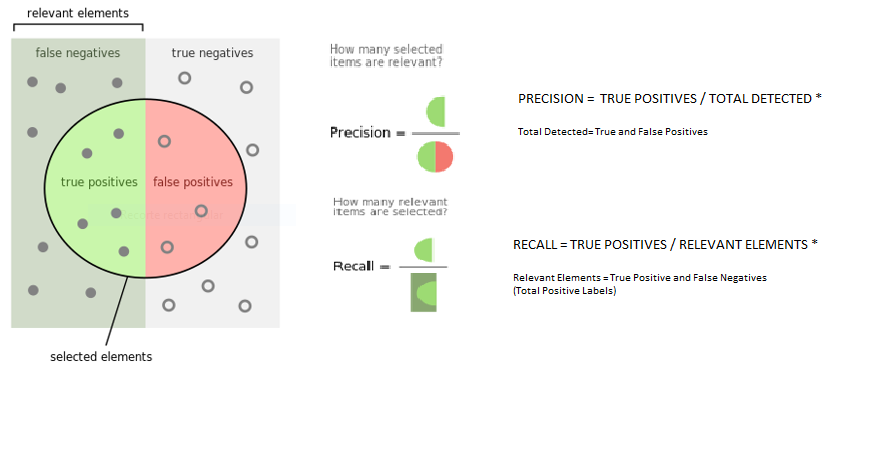

#### F1 score is  [ 2∗precision∗recall / precision+recall ] 
 
 ##### F1 score can be interpreted as a weighted average of the precision and recall


### Metrics for Stratified ShuffleSplit

#### 1) Classification Report

In [10]:

print(classification_report(Ytest,Ypred))

             precision    recall  f1-score   support

          0       0.91      0.86      0.88        35
          1       0.92      0.95      0.94        62

avg / total       0.92      0.92      0.92        97



### Comments for Classification Report with Stratified:

#### Target 0 (Malign Cancer):  

Precision = 91 % (Malign correctly Detected / Total Detected (When detected and it REALLY is and when detected but NOT is)). 

Recall = 86 % (Malign correctly Detected / Relevant Elements (When detected and REALLY it is and when NO detected but really it is, so all that should be detected)). 

F1score = 88 % (Malign average correctly detected). Total 42 cases.

#### Target 1 (Benign Cancer):  

Precision = 92 % (Benign correctly Detected / Total Detected (When detected and it is and when detected but NOT is)). 

Recall = 95 % (Benign correctly Detected / Relevant Elements (When detected and it is and when No detected but It is, so all that should be detected)). 

F1score = 94 % (Benign average correctly detected). Total 72 cases.

#### 2) Confusion matrix and Comments

In [11]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_pred=Ypred,y_true=Ytest).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("Normalized results for a 97 study cases:")
print("____________________________________________________________")
print("True Negatives: Nº Predict benign which are benign " + str(tn))
print("False Positives: Nº predict malign that are benign! " + str(fp))
print("False Negatives: Nº Predict benign that are malign! " + str(fn))
print("True Positives: Nº Predict malign that, unfortunnately, are malign " + str(tp))


Normalized results for a 97 study cases:
____________________________________________________________
True Negatives: Nº Predict benign which are benign 30
False Positives: Nº predict malign that are benign! 5
False Negatives: Nº Predict benign that are malign! 3
True Positives: Nº Predict malign that, unfortunnately, are malign 59


## 5) Let´s try with Shuffle AND compare with stratified

In [12]:

from sklearn.model_selection import ShuffleSplit

miss= ShuffleSplit(20, 0.2)

for train_index, test_index in miss.split(X_model,Y_model):
    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]
    misKvecinos.fit(Xtrain,Ytrain)
    Ypred = misKvecinos.predict(Xtest)
    fallos.append(sum(Ypred != Ytest))
    index = index+1

print("Accuracy is: "+ str(sum(Ypred == Ytest) / len(Ytest)))

Accuracy is: 0.958762886598


### Metrics for ShuffleSplit

#### 1) Classification Report

In [13]:

print(classification_report(Ytest,Ypred))

             precision    recall  f1-score   support

          0       0.98      0.93      0.95        43
          1       0.95      0.98      0.96        54

avg / total       0.96      0.96      0.96        97



In [14]:
print( " Numero medio de errores  " + str(100*np.mean(fallos)/len(Ytest)))
print( " Desviacion Standar de errores " + str(100*np.std(fallos)/len(Ytest)))

 Numero medio de errores  7.34536082474
 Desviacion Standar de errores 2.14010661628


#### Comments for Classification Report with Shuffle:

#### Target 0 (Malign Cancer):  

Precision = 98 % (Malign correctly Detected / Total Detected (When detected and it REALLY is and when detected but NOT is)). 

Recall = 93 % (Malign correctly Detected / Relevant Elements (When detected and REALLY it is and when NO detected but really it is, so all that should be detected)). 

F1score = 95 % (Malign average correctly detected). Total 46 cases.

#### Target 1 (Benign Cancer):


Precision = 95 % (Benign correctly Detected / Total Detected (When detected and it is and when detected but NOT is)). 

Recall = 98 % (Benign correctly Detected / Relevant Elements (When detected and it is and when No detected but It is, so all that should be detected)). 

F1score = 96% (Benign average correctly detected). Total 68 cases.

#### 2) Confussion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_pred=Ypred,y_true=Ytest).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("Normalized results for a 97 study cases:")
print("____________________________________________________________")
print("True Negatives: Nº Predict benign which are benign " + str(tn))
print("False Positives: Nº predict malign that are benign! " + str(fp))
print("False Negatives: Nº Predict benign that are malign! " + str(fn))
print("True Positives: Nº Predict malign that, unfortunnately, are malign " + str(tp))


Normalized results for a 97 study cases:
____________________________________________________________
True Negatives: Nº Predict benign which are benign 40
False Positives: Nº predict malign that are benign! 3
False Negatives: Nº Predict benign that are malign! 1
True Positives: Nº Predict malign that, unfortunnately, are malign 53


# Answer 5)

##### According to our classification report in Stratified or just Shuffle (NO STRATIFIED), we can say that for small dataset with similar number of labels (Bening and Malign) we get more or less same average for our metrics. 

##### Stratified is recommended when there is not same percentage number of labeles (Eg: 20% "0" and 80% "1") and we want mantain the proportion of labels (in eg: 20/80) in all folks. 



# Cross Validation Score using a Kfold model (misKvecinos)

In [16]:
from sklearn.model_selection import cross_val_score
micvs = cross_val_score(misKvecinos,X_model,Y_model, cv=20)

print("mean " +str(np.mean(micvs)))
print( "Std " +str(np.std(micvs)))

mean 0.933583333333
Std 0.0580284293352


#####  Obviously, is necesary compare the mean average of more iterations for supporting conclusions. Even if, this time, with this data, we can hold that model has improve the accuracy with a low standard desviation over the just shuffle method. Let´s continue before check the models with Cross Testing one time we use GridsearchCV for next chapter (Number 4 to Questions).  

# Leave Out One (LOO), 

Just for comparing with before Iterators:

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

loocv =model_selection.LeaveOneOut()
model= LogisticRegression()
results = model_selection.cross_val_score(model, X_model, Y_model, cv=loocv)

print("mean "+str(np.mean(results)))
print(" Std "+str(np.std(results)))

mean 0.952380952381
 Std 0.212958855


### Comments about Kfold and LOO comparation:

#### According to Library predictions, LOO has improve Bias (mean has increased) BUT Variance (Std) has increased too... Otherwise, LOO take more time; from we can infer a longer time calculating...We´ll do it in GridSearch using **start time function.**

#### The LOO method doesn´t create groups, but take as many iterations as samples (leaving each time just one sample out for compare). That reach a usually better accuracy mean, but increase the STD, because score results are just "1" or "0" for fit model, increasing at the same time the score deviation. We will study again in exhausted models using GridSearchCV.

# Answer 4)

# Exhaustive search over specified parameter values for an estimator: GridSearchCV

### What we should do is, just for comparing, execute also Kfolds and LOO for comparing the CV parameter:

>Redefine misKvecinos with a no fix number of K.// Do as miKvecinos.

>According instructions, we will validate with leave-one-out despite Kfolds

   ## 'e.g: kfolds'

In [18]:
from sklearn.neighbors import KNeighborsClassifier
miKvecinos = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

mi_param_grid = {'n_neighbors' :[3,5,7,9,11,13,15],'weights':['uniform','distance']}
migscv = GridSearchCV(miKvecinos,mi_param_grid,cv=10,verbose=2)
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorKvecino = migscv.best_estimator_
miMejorKvecino.fit(Xtrain,Ytrain)
miMejorKvecino.score(Xtest,Ytest)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


0.90721649484536082

In [19]:
print(miMejorKvecino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


##### Comments: According to our solution, with the data used, our best Classifier is with nº_neighbors = 13 and weight uniform. We will check the results with our Validation dataset applying Cross-testing. 

In [20]:
Y_production = miMejorKvecino.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.976744186047


#### CONCLUSIONS: Our model has better accuracy in cross testing than cross validation. Other hand, both are not so bad scoring (even if, maybe we should play with other parameters avoinding a little underfitting).

## 'e.g: LOO'

In [21]:
loocv =model_selection.LeaveOneOut() # Introducing LOO as object
mi_param_grid = {'n_neighbors' :[3,5,7,9,11,13,15],'weights':['uniform','distance']}
migscv = GridSearchCV(miKvecinos,mi_param_grid,cv=loocv,verbose=2)
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("Execution time with LOO is: "+ str((time.time()-start)))
#...LOO cross Validation, a Never Ended Compiling History...
miMejorKvecinoloo = migscv.best_estimator_
miMejorKvecinoloo.fit(Xtrain,Ytrain)
migscv.best_score_
miMejorKvecinoloo.score(Xtest,Ytest)

Fitting 386 folds for each of 14 candidates, totalling 5404 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n

[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   0.0s
[CV] n

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n

[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n

[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] ................. n_neighbors=11, weights=distance, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV] .

[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n

[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .................. n_neighbors=13, weights=uniform, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV] .

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n

[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] ................. n_neighbors=13, weights=distance, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV] .

[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .

[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n_neighbors=15, weights=uniform .................................
[CV] .................. n_neighbors=15, weights=uniform, total=   0.0s
[CV] n

[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 5404 out of 5404 | elapsed:   29.2s finished


0.90721649484536082

### Comments: Despite the time in compiling is highly more, ( 34.5 seconds) PROBABLY DIFFERENT when you RUN (;P),  the best estimator is also different: 


In [22]:
print(miMejorKvecinoloo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')


### On the other hand, the best stimator for LOO for miMejorKvecinoloo is, in this case 11 n_neighbors and weights = 'uniform'.

In [23]:
Y_productionlo = miMejorKvecinoloo.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_productionlo == Y_validation) / len(Y_validation)))

Accuracy is: 0.976744186047


#### CONCLUSIONS: Our model has better accuracy in cross testing than cross validation. Other hand, both are not so bad scoring (even if, maybe we should play with other parameters avoinding a little underfitting). After check for other people, nobody know why it´is exactly same results for .score with Kfolds and LOO...sorry

# Answer 6) optimized K neighbors and fit 'distance' in weights parametric

### Comments: Using LOO cross validation, we will deal with parameters, using just 'distance' for weight and excluding uniform.

In [24]:
print(miMejorKvecino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [25]:
mi_param_grid = {'n_neighbors' : [9],'weights': ['distance']}
migscv1 = GridSearchCV(miKvecinos,mi_param_grid,cv=loocv,verbose=2)
migscv1.fit(Xtrain,Ytrain)
miMejorKvecinod = migscv1.best_estimator_
miMejorKvecinod.fit(Xtrain,Ytrain)
migscv.best_score_
miMejorKvecino.score(Xtest,Ytest)


Fitting 386 folds for each of 1 candidates, totalling 386 fits
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=9, weights=distance, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done 386 out of 386 | elapsed:    2.1s finished


0.90721649484536082

### Conclusions: Obvoiusly, we reach same result than last approximation, cause just use LOO exclusing weight: uniform, but it´s exactly the same that miMejorKvecino. Has not sense replicate the cross test here again...

# Decomposition library, and visualizing the dataset

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [9]:
miPCA = PCA(n_components = 2)
X_PCA = miPCA.fit_transform(Xtrain)


In [28]:
print(miPCA.explained_variance_ratio_)

[ 0.97998624  0.01790337]


#### Obviously Axis=0 the 'x', is a better approximtaion to model with a mean of 98.% over mode Axis=1, (just 0.017%)

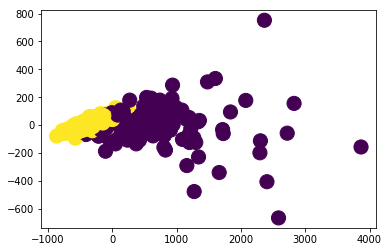

In [29]:
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=200,c=Ytrain)
plt.show()

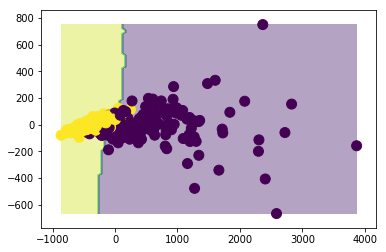

In [30]:
miKNN = KNeighborsClassifier(n_neighbors = 30)
miKNN.fit(X_PCA,Ytrain)
# And now we will create a "Grill" for visualize with a Z axis


xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

Z = miKNN.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
plt.axis('tight')
plt.show()

# Answer 7) Following the class explanation, we will change the "metric" parameter in KNeighborsClassifier trying to get still a better prediction:     'E.g: Euclidean'

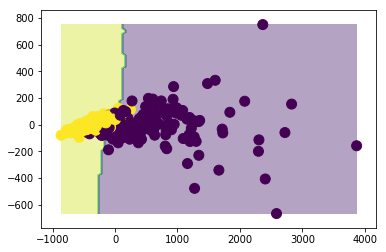

In [31]:
miKNN = KNeighborsClassifier(n_neighbors = 30, metric='euclidean')
miKNN.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

Z = miKNN.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

# Naives Bayes Gaussian 

In [32]:
from sklearn.naive_bayes import GaussianNB

miGNB = GaussianNB()

micvs = cross_val_score(miGNB,Xtrain,Ytrain,cv=10)

print( "Mean: " + str(np.mean(micvs)))
print( "Std: " + str(np.std(micvs)))



Mean: 0.937712003501
Std: 0.040524863695


#### Gaussian Model is popular in Medical Dominio. Let´s compare the Gausan Naives Bayes model with this data refering to others...

In [33]:
miGNB = GaussianNB()
miGNB.fit(Xtrain,Ytrain)

for train_index, test_index in misss.split(X_model,Y_model):
    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]
    miGNB.fit(Xtrain,Ytrain)
    YpredNB = miGNB.predict(Xtest)
    

print(" Accuracy mean :"+ str (sum(YpredNB == Ytest) / len(Ytest)))


 Accuracy mean :0.917525773196


### Metrics for Gaussian Naives Bayes 

#### Confussion Matrix

In [34]:
tn, fp, fn, tp = confusion_matrix(y_true=Ytest, y_pred=YpredNB).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("True Negatives: Predict benign Cancer which are bening cancer" + str(tn))
print("False Positives: predict malign  Cancer that benign! " + str(fp))
print("False Negatives: Predict beningn that MALIGN CANCER!" + str(fn))
print("True Positives: Predict  malign Cancer that, unfortunnately, are malign Cancer" + str(tp))

True Negatives: Predict benign Cancer which are bening cancer36
False Positives: predict malign  Cancer that benign! 3
False Negatives: Predict beningn that MALIGN CANCER!5
True Positives: Predict  malign Cancer that, unfortunnately, are malign Cancer53


#### Classification Report

In [35]:
print(classification_report(Ytest,YpredNB))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90        39
          1       0.95      0.91      0.93        58

avg / total       0.92      0.92      0.92        97



### Cross Testing with Naives Bayes.  

In [36]:
Y_production = miGNB.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.96511627907


#### Conclusions: After repeat the NB experiment, we can conclude that not big differences with KNN, but average of failures is lower for Naives Bays Gaussian and more stable behaivour repeating the experiment.  


#### Both (Model and Validation) prediction reach high scores, so we can talk about a robust model for our dataset.

# SVM (Support Vector Machine)

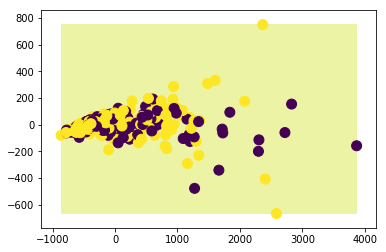

In [37]:
from sklearn.svm import SVC

miSVC = SVC(C=10, gamma=10,kernel='rbf')
miSVC.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miSVC.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

In [38]:
for train_index, test_index in misss.split(X_model,Y_model):
    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]
    miSVC.fit(Xtrain,Ytrain)
    YpredSVC = miSVC.predict(Xtest)
    
print(" Accuracy in % :"+ str ((sum(YpredSVC == Ytest)/ len(Ytest))*100))

 Accuracy in % :64.9484536082


### Sinceriously, it´s a very BAD fitting. So, let´s see in this case if possible playing with 2 parametres: C from 1 to 1000 and with kernel (Linear, Poli and RBF) for find our best.

In [12]:
from sklearn.model_selection import GridSearchCV

#SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, 
#probability=False, tol=0.001, cache_size=200, class_weight=None, 
#verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

param_grid = {'C': [1, 10, 100], 'kernel': ['linear']} #, 'poly', 'rbf'
miSVC = SVC()

migscv = GridSearchCV(miSVC, param_grid,cv=10,verbose=2) 
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorEstimador= migscv.best_estimator_
miMejorEstimador.fit(Xtrain,Ytrain)
miMejorEstimador.score(Xtest,Ytest)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.1s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.7s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.7s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.4s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.5min finished


execution time for : 95.97851586341858


0.92783505154639179

In [40]:
print(miMejorEstimador)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [14]:
print(miMejorEstimador.score(Xtest,Ytest))

0.927835051546


### In a better Cluster or PC we will repeat the experiment with poly: (My laptop can not execute with high C and rbf or poly kernel at same time)

In [13]:
Y_production = miMejorEstimador.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.976744186047


### Comments: SVC is a very most costive (in time, and parameters to fitting) model. Even with this dataset, meddium or little samples, we could not apply some parameters due to hardware not efficient.

### Moreover, we have get really good scores both for model and production. 

### Let´s check if we can Show a new plot with last results:

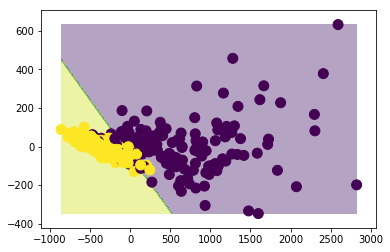

In [10]:
from sklearn.svm import SVC

miSVC = SVC(C=100, kernel='linear')
miSVC.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miSVC.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

## IMPORTANT NOTE: Obviously I should check now: 

> #### PARAMETERS: Kernel: POLY AND RBF and C from 0.001 to 1
> #### CROSS VALIDATION ITERATORS: At least, repeat all done in KFolds with LOO... In Cluster or a better laptop...

### FOR TIME AND _"JUST-INTRODUCTION-COURSE-PURPOUSES REASONS"_, WE WILL DO IT IN A FUTURE REVISION TO THIS EXPERIMENTS... WHEN BETTER PC!!!

### OF COURSE IT´S ALSO VALID FOR THE OTHER MODELS.

# Decission Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

miDT = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
micvs = cross_val_score(miDT,Xtrain,Ytrain,cv=10)

print("Mean: " + str(np.mean(micvs)))
print( "Std: " + str(np.std(micvs)))

Mean: 0.927395411606
Std: 0.0427889661452


DecissionTree Clasifier has not bad bias (mean) but a better variance ration. So, we can apply to take decissions in medical paradigma. How could we know how good is Decission Tree for a Cancer Breast Prediction? Let´s see:


In [38]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

param_grid = {'max_depth': [7,8,9,10,11,12]} # Just use max_depth
miDT =  DecisionTreeClassifier()

migscv = GridSearchCV(miDT, param_grid,cv=10,verbose=2) 
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorEstimador= migscv.best_estimator_
miMejorEstimador.fit(Xtrain,Ytrain)
miMejorEstimador.score(Xtest,Ytest)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


0.90721649484536082

In [36]:
print(miMejorEstimador)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## Metrics for Decission Tree

#### Confussion Matrix in DT###

In [24]:
from sklearn.metrics import confusion_matrix

miDT.fit(Xtrain, Ytrain)
YpredDt=miDT.predict(Xtest)


tn, fp, fn, tp = confusion_matrix(y_pred=YpredDt,y_true=Ytest).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("True Negatives: Predict Non Cancer which are no cancer" + str(tn))
print("False Positives: predict  Cancer that ARE NOT CANCER!" + str(fp))
print("False Negatives: Predict NON cancer that ARE CANCER!" + str(fn))
print("True Positives: Predict Cancer that, unfortunnately, are Cancer" + str(tp))

True Negatives: Predict Non Cancer which are no cancer39
False Positives: predict  Cancer that ARE NOT CANCER!5
False Negatives: Predict NON cancer that ARE CANCER!2
True Positives: Predict Cancer that, unfortunnately, are Cancer51


##### Classification Report

In [21]:
print(classification_report(Ytest,YpredDt))

             precision    recall  f1-score   support

          0       0.90      0.86      0.88        44
          1       0.89      0.92      0.91        53

avg / total       0.90      0.90      0.90        97



### So now, we will apply a model of DT combined with Decomposition Library, just for check the plotting and compare decission frontier with Kfolds model and KNN.

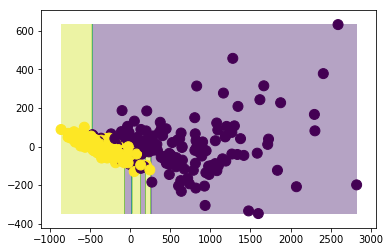

In [19]:
miPCA = PCA(n_components = 2)
X_PCA = miPCA.fit_transform(Xtrain)

miDT = DecisionTreeClassifier()
miDT.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miDT.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()


Obviously we can check a more "linear" decission frontier than in other models.. But visually overfitted.

CONCLUSIONS: Despite tried to "play" with max_depth parametre, not definetively conclusions about the best fitting. I tried with a range from 2 to 10 max_depth and several times with not a great variance in results...

How did I do? Sinceriously?? __PURE HEURISTIC WAY!__ and cross validation scores.

1) I tried use the graphics PDF conversor with export_graphviz, but really was not able to...

2) Despite parametric regulation, n_size input was fix...and I should consider look for optimal fitting value to in a future.


### Cross Testing

In [39]:
Y_production = miMejorEstimador.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.976744186047


### Comments: Again we have reach good results and with less time than SVC. Thats a very interesting method for take decission and some similar working areas with Deep Learning





# **ENSEMBLE METHODS IN CLASSIFICATION**

## Random Forest

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

miRF = RandomForestClassifier(n_estimators=10)
micvs = cross_val_score(miRF,Xtrain,Ytrain,cv=10)

print("Mean: " + str(np.mean(micvs)))
print( "Std: " + str(np.std(micvs)))

Mean: 0.948110661269
Std: 0.0233227313957


In [43]:
from sklearn.model_selection import GridSearchCV

#RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

param_grid = {'n_estimators': [10,50,100], 'n_jobs': [4]} # Just use estimator and all jobs possible!
miRF = RandomForestClassifier()

migscv = GridSearchCV(miRF, param_grid,cv=10,verbose=2) 
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorEstimador= migscv.best_estimator_
miMejorEstimador.fit(Xtrain,Ytrain)
miMejorEstimador.score(Xtest,Ytest)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.2s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] ........................ n_estimators=10, n_jobs=4, total=   0.1s
[CV] n_estimators=10, n_jobs=4 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.5s finished


0.95876288659793818

In [44]:
print(miMejorEstimador)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


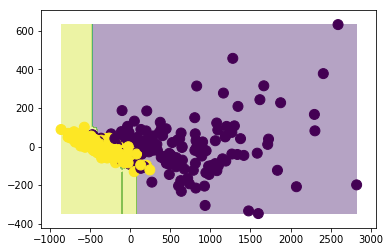

In [45]:
from sklearn.ensemble import RandomForestClassifier

miPCA = PCA(n_components = 2)
X_PCA = miPCA.fit_transform(Xtrain)

miRF = RandomForestClassifier(n_estimators=50)
miRF.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miRF.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()


#### Comments: Just exploring how max_depth for a better fitting model avoiding the overfitting (reducing depth) None value for max_depth make the model maximum depth of the tree. Then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

### Metrics for Decission Tree

#### Confussion Matrix in DT###

In [48]:
from sklearn.metrics import confusion_matrix

miRF.fit(Xtrain, Ytrain)
YpredRF=miRF.predict(Xtest)


tn, fp, fn, tp = confusion_matrix(y_pred=YpredDt,y_true=Ytest).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("True Negatives: Predict Non Cancer which are no cancer" + str(tn))
print("False Positives: predict  Cancer that ARE NOT CANCER!" + str(fp))
print("False Negatives: Predict NON cancer that ARE CANCER!" + str(fn))
print("True Positives: Predict Cancer that, unfortunnately, are Cancer " + str(tp))

True Negatives: Predict Non Cancer which are no cancer39
False Positives: predict  Cancer that ARE NOT CANCER!5
False Negatives: Predict NON cancer that ARE CANCER!2
True Positives: Predict Cancer that, unfortunnately, are Cancer 51


#### Random Forest

In [49]:
print(classification_report(Ytest,YpredRF))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94        44
          1       0.91      1.00      0.95        53

avg / total       0.95      0.95      0.95        97



### Cross testing

In [50]:
Y_production = miMejorEstimador.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.988372093023


### Conclusion: At the moment, thats the best model for fit this dataset. Is an improve of DT, because we are using a forest with 50 (as best estimator) and getting really good scores (both close to 1). 

# BOOSTING

#### The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction

In [60]:
from sklearn.ensemble import AdaBoostClassifier

miADB = AdaBoostClassifier(n_estimators=100)

for train_index, test_index in misss.split(X_model,Y_model):
    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]
    miADB.fit(Xtrain,Ytrain)
    YpredADB = miADB.predict(Xtest)
    
print("Accuracy for this model are JUST! " + str (sum(YpredADB == Ytest)/ len(Ytest)))

Accuracy for this model are JUST! 0.969072164948


In [53]:
from sklearn.model_selection import GridSearchCV

#AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

param_grid = {'n_estimators': [10,50,100]} # Just use estimator and all jobs possible!
miADB = AdaBoostClassifier(n_estimators=100)

migscv = GridSearchCV(miADB, param_grid,cv=10,verbose=2) 
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorEstimador= migscv.best_estimator_
miMejorEstimador.fit(Xtrain,Ytrain)
miMejorEstimador.score(Xtest,Ytest)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.7s finished


0.97938144329896903

In [61]:
print(miMejorEstimador)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


execution time for fitting in secs : 0.10028624534606934


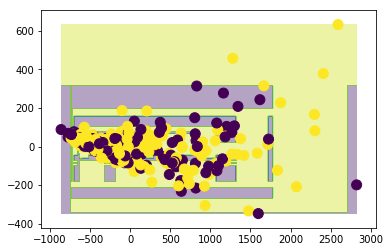

In [62]:
from sklearn.ensemble import AdaBoostClassifier

miADB = AdaBoostClassifier(n_estimators=50)
start=time.time()
miADB.fit(X_PCA,Ytrain)
print("execution time for fitting in secs : " + str((time.time()-start)))


xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miADB.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

#### Pint it was not a good idea... But let´s see metrics. 

### Metrics for Adda Boosting

#### Classification Report

In [55]:
print(classification_report(Ytest,YpredADB))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        37
          1       0.97      1.00      0.98        60

avg / total       0.98      0.98      0.98        97



#### Sumarizing, we make learn the model with weaks learners but in not just an error reinforce way. That makes that fitting n_estimator, we reach a really good prediction model. Otherwise, time for fitting is no longer than other models (e.g: SVC). 

### Cross Testing

In [63]:
Y_production = miMejorEstimador.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 1.0


### Conclusions: That model is visually overfitted. On the same way, we reach the best scores in both model and testing. 

# NEURAL NETWORKS

##### Adding multiple layers, despite is still supervised, the model could predict new labels for new samples. Usually the parameter for fitting (predicting) has relation with layers 

In [65]:
from sklearn.neural_network import MLPClassifier

miMLP = MLPClassifier() 

for train_index, test_index in misss.split(X_model,Y_model):
    Xtrain = x[train_index, :]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]
    miMLP.fit(Xtrain,Ytrain)
    YpredNN = miMLP.predict(Xtest)
    
print(" Accuracy in % :"+ str ((sum(YpredNN == Ytest)/ len(Ytest))*100))

 Accuracy in % :40.206185567


## Let´s try to Fit it better searching for a best estimator...

In [73]:
from sklearn.model_selection import GridSearchCV

# MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
# nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
# epsilon=1e-08)

# Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples 
# or more) in terms of both training time and validation score. 
# For small datasets LIKE THIS, however, ‘lbfgs’ can converge faster and perform better.

param_grid = {'hidden_layer_sizes': [(100,10), (200,)], 'solver': ['lbfgs']} #, 'adam', 'sgd'
miMLP = MLPClassifier()

migscv = GridSearchCV(miMLP ,param_grid, cv=10) 
start=time.time()
migscv.fit(Xtrain,Ytrain)
print("execution time for : " + str((time.time()-start)))
#We will select the best for accuracy.
miMejorEstimador= migscv.best_estimator_
miMejorEstimador.fit(Xtrain,Ytrain)
miMejorEstimador.score(Xtest,Ytest)

execution time for : 4.0647313594818115


0.93814432989690721

In [74]:
print(miMejorEstimador)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


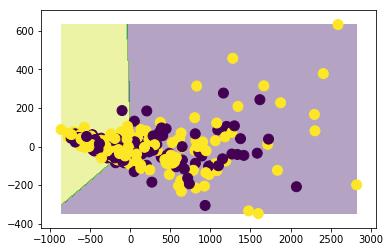

In [78]:
from sklearn.neural_network import MLPClassifier

miMLP = MLPClassifier(hidden_layer_sizes=(200, ),max_iter=200)
miMLP.fit(X_PCA,Ytrain)

xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),500),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),500))

Z = miMLP.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha= 0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Ytrain)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()


### Metrics for Neural Network

#### Classification Report

In [80]:
YpredNN = miMejorEstimador.predict(Xtest)
    
print(classification_report(Ytest,YpredNN))


             precision    recall  f1-score   support

          0       1.00      0.87      0.93        45
          1       0.90      1.00      0.95        52

avg / total       0.94      0.94      0.94        97



In [83]:
tn, fp, fn, tp = confusion_matrix(y_pred=YpredNN,y_true=Ytest).ravel()
#print("true negatives" +tn, "false positives: "+fp, " false negatives: " +fn, "true positives: "+tp )

print("True Negatives: Predict Non Cancer which are no cancer" + str(tn))
print("False Positives: predict  Cancer that ARE NOT CANCER!" + str(fp))
print("False Negatives: Predict NON cancer that ARE CANCER!" + str(fn))
print("True Positives: Predict Cancer that, unfortunnately, are Cancer " + str(tp))

True Negatives: Predict Non Cancer which are no cancer39
False Positives: predict  Cancer that ARE NOT CANCER!6
False Negatives: Predict NON cancer that ARE CANCER!0
True Positives: Predict Cancer that, unfortunnately, are Cancer 52


### Cross testing

In [81]:
Y_production = miMejorEstimador.predict(X_validation)

print("Accuracy is: "+ str(sum(Y_production == Y_validation) / len(Y_validation)))

Accuracy is: 0.941860465116


### Comments: Again, we fit a model with similar and high scores in cross validations (thanks to Best_Estimator_ and GridSerachCV_) and cross testing. Despite draw is certainly worst than first revision, I have learn to be more sistematic this time and appreciate in a wide perspective parametes and influence of them in models.

# General Conclusions:

### In addition, it is interesting  be consciencious of production time. In future researches, I mind keep a "slice" of dataset for being able to check the best estimator of each model in diferent to trainned data. You have read comments in all models, comparing the results and time of each other.

### Finally, I appreciate your time and patient with this new review and your students, but your feedback make us better, so I highly appreciate some contributions to present research. Thank you